In [3]:
# Include Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Read Urban Spatial Order data

df_urban = pd.read_csv('UrbanSpatialOrder.csv')

In [5]:
# Describing the dataset

df_urban.describe()

,φ,Ηo,Ηw,ĩ,ς,k̅,Pde,P4w
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.178790,3.351270,3.339230,82.990000,1.055980,2.923000,0.147580,0.228080
std,0.224408,0.323212,0.337918,27.941044,0.027253,0.264333,0.080086,0.126133
min,0.002000,2.083000,2.103000,23.200000,1.011000,2.348000,0.027000,0.061000
25%,0.024000,3.244250,3.233500,64.550000,1.036750,2.710750,0.083750,0.138250
50%,0.062000,3.514500,3.495500,80.650000,1.052500,2.947500,0.130500,0.191000
75%,0.284750,3.557000,3.553250,97.125000,1.073000,3.107750,0.204250,0.309500
max,0.899000,3.582000,3.581000,233.000000,1.148000,3.548000,0.395000,0.576000


In [6]:
# Finding the count of all null values in each column
df_urban.isna().sum()

Region    0
City      0
φ         0
Ηo        0
Ηw        0
ĩ         0
ς         0
k̅        0
Pde       0
P4w       0
dtype: int64

In [7]:
# Removing the Region and City data from the original dataset
df_region = df_urban[['Region', 'City']]

In [8]:
# Only the key indicators are used for Clustering process
df_values=df_urban.drop(['Region', 'City'], axis = 1)

In [9]:
# Using Min Max Normalisation for scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_values)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = df_values.columns

In [10]:
df_scaled

,φ,Ηo,Ηw,ĩ,ς,k̅,Pde,P4w
0,0.114827,0.921948,0.912720,0.197331,0.350365,0.030833,0.904891,0.091262
1,0.371237,0.729820,0.746279,0.735462,0.306569,0.530833,0.293478,0.349515
2,0.008919,0.993996,0.993911,0.196378,0.394161,0.218333,0.595109,0.079612
3,0.011148,0.992662,0.987821,0.180172,0.919708,0.486667,0.236413,0.219417
4,0.183946,0.872582,0.841678,0.141087,0.394161,0.327500,0.402174,0.067961
...,...,...,...,...,...,...,...,...
95,0.803790,0.306204,0.251015,0.352717,0.124088,0.632500,0.296196,0.598058
96,0.305463,0.782522,0.759134,0.399428,0.087591,0.680833,0.192935,0.607767
97,0.526198,0.598399,0.529093,0.380839,0.576642,0.538333,0.222826,0.302913
98,0.832776,0.270180,0.209743,0.383699,0.080292,0.800000,0.125000,0.765049


In [12]:
# Correlation matrix for the data values
df_scaled.corr()

,φ,Ηo,Ηw,ĩ,ς,k̅,Pde,P4w
φ,1.000000,-0.993251,-0.987181,0.265871,-0.430976,0.518370,-0.376544,0.633536
Ηo,-0.993251,1.000000,0.993164,-0.259790,0.421982,-0.505568,0.360832,-0.625797
Ηw,-0.987181,0.993164,1.000000,-0.269370,0.403609,-0.477978,0.341059,-0.594683
ĩ,0.265871,-0.259790,-0.269370,1.000000,-0.132045,0.180867,-0.089978,0.266616
ς,-0.430976,0.421982,0.403609,-0.132045,1.000000,-0.671701,0.572356,-0.688688
k̅,0.518370,-0.505568,-0.477978,0.180867,-0.671701,1.000000,-0.935238,0.903156
Pde,-0.376544,0.360832,0.341059,-0.089978,0.572356,-0.935238,1.000000,-0.700131
P4w,0.633536,-0.625797,-0.594683,0.266616,-0.688688,0.903156,-0.700131,1.000000


Text(0.5, 1.0, 'Fig 1: Correlation Heatmap')

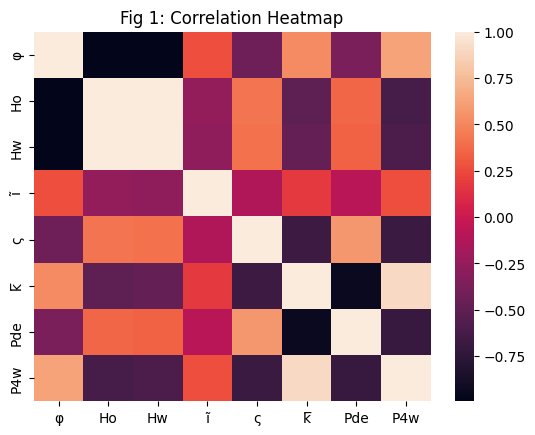

In [13]:
# Visualising the dataset correlation
sns.heatmap(df_scaled.corr())
plt.title("Fig 1: Correlation Heatmap")

In [14]:
# We can see that Ho and Hw are highly correlated.

# With reference to the paper 'Urban Spatial Order: Street Network Orientation, Configuration, and Entropy' ,
# dropping Hw (redundant feature) and Ho is used, unless specified

df_scaled = df_scaled.drop(['Ηw'], axis = 1)

***K Means Clustering***
1. K Means Clustering is done with **n_clusters = 2** and SSE is calculated.
2. The line graph is plotted for **Elbow Method**: WCSS (Within Cluster Sum of Squares) V/S K value (no. of clusters).
3. The predicted class labels are added to the dataset for further analysis.

In [16]:
# Importing necessary libraries and performing K Means with n_clusters = 2 (verified later with the elbow method)
from sklearn.cluster import KMeans
modelK = KMeans(n_clusters=3, n_init="auto")
modelK.fit(df_scaled)

# Model Inertia (SSE)
print('SSE = ', modelK.inertia_)

SSE =  12.85573131067291


In [17]:
modelK.labels_

array([2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 0, 2, 1, 0, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2,
       2, 2, 0, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Text(0.5, 1.0, 'Fig 2: WCSS vs K')

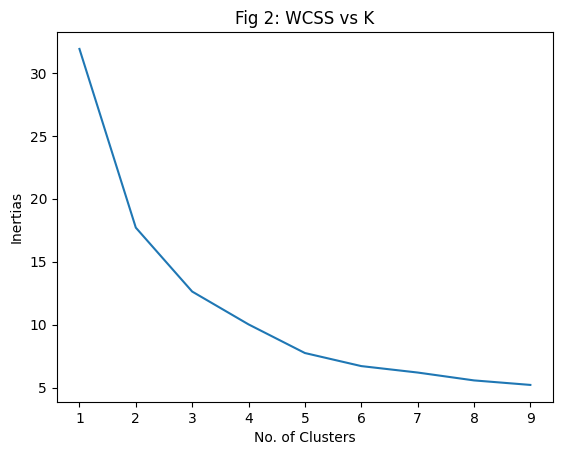

In [18]:
# Plotting the line graph for Elbow Method
k=[]
wcss=[]

for i in range(1, 10):
  model = KMeans(n_clusters=i, n_init=10)
  model.fit(df_scaled)
  k.append(i)
  wcss.append(model.inertia_)

sns.lineplot(x = k, y = wcss)
plt.xlabel("No. of Clusters")
plt.ylabel("Inertias")
plt.title("Fig 2: WCSS vs K")

***Hierarchical Clustering***

1. Hierarchical Clustering is done with **Measure of distance** as **Euclidean** and **Linkage** as **Complete**
2. Plotting **Dendrograms** for **different Linking techniques** (Single, Complete, Average and Centroid)
3. The predicted class labels are added to the dataset for further analysis.

In [19]:
# Importing necessary libraries for Hierarchical Clustering and for drawing Dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
modelH = AgglomerativeClustering(n_clusters=3, affinity ="euclidean", linkage= "complete")
modelH.fit(df_scaled)
modelH.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 2, 2, 2, 1,
       1, 0, 1, 0, 0, 2, 1, 2, 1, 0, 2, 1])

***Task 9 and 10***
- ***Try all the linkage criteria***
- ***Plot the dendogram for each criteria***

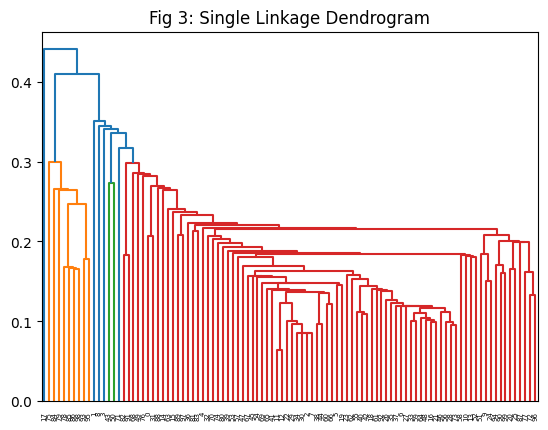

In [24]:
# Dendrogram using SINGLE linkage
z = linkage(df_scaled, method = 'single')
dendrogram(z)
plt.title("Fig 3: Single Linkage Dendrogram")
plt.show()

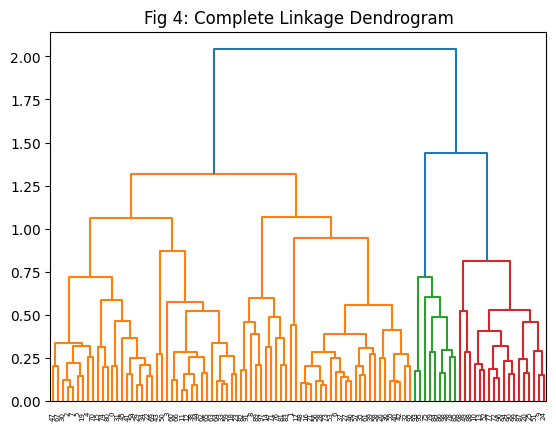

In [25]:
# Dendrogram using COMPLETE linkage
z = linkage(df_scaled, method = 'complete')
dendrogram(z)
plt.title("Fig 4: Complete Linkage Dendrogram")
plt.show()

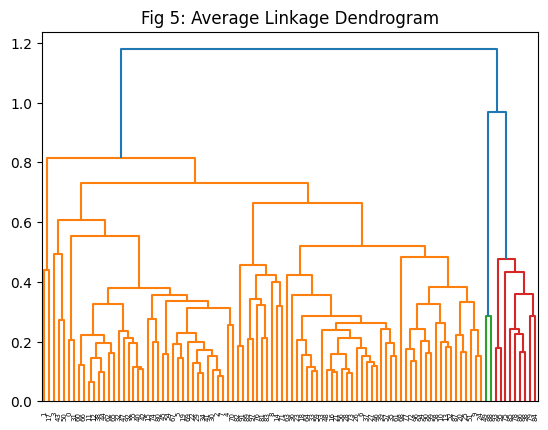

In [26]:
# Dendrogram using AVERAGE linkage
z = linkage(df_scaled, method = 'average')
dendrogram(z)
plt.title("Fig 5: Average Linkage Dendrogram")
plt.show()

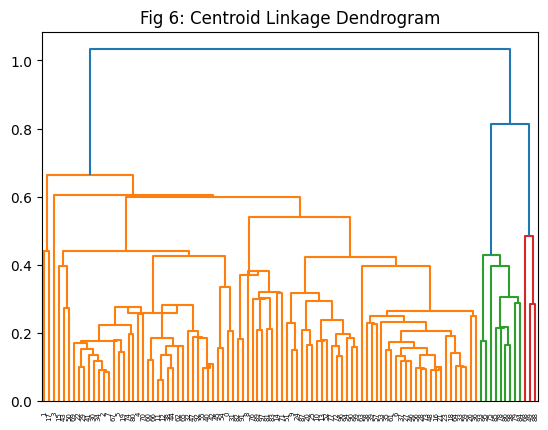

In [27]:
# Dendrogram using CENTROID linkage
z = linkage(df_scaled, method = 'centroid')
dendrogram(z)
plt.title("Fig 6: Centroid Linkage Dendrogram")
plt.show()

In [28]:
# Adding class labels to the dataset
df_scaled['KMeansLabels'] = modelK.labels_

In [29]:
# Adding Hierarchical Class Clusters
df_scaled['HierarchicalLabels'] = modelH.labels_

In [30]:
df_scaled

,φ,Ηo,ĩ,ς,k̅,Pde,P4w,KMeansLabels,HierarchicalLabels
0,0.114827,0.921948,0.197331,0.350365,0.030833,0.904891,0.091262,2,0
1,0.371237,0.729820,0.735462,0.306569,0.530833,0.293478,0.349515,1,0
2,0.008919,0.993996,0.196378,0.394161,0.218333,0.595109,0.079612,2,0
3,0.011148,0.992662,0.180172,0.919708,0.486667,0.236413,0.219417,2,0
4,0.183946,0.872582,0.141087,0.394161,0.327500,0.402174,0.067961,2,0
...,...,...,...,...,...,...,...,...,...
95,0.803790,0.306204,0.352717,0.124088,0.632500,0.296196,0.598058,0,2
96,0.305463,0.782522,0.399428,0.087591,0.680833,0.192935,0.607767,0,1
97,0.526198,0.598399,0.380839,0.576642,0.538333,0.222826,0.302913,0,0
98,0.832776,0.270180,0.383699,0.080292,0.800000,0.125000,0.765049,0,2


In [31]:
# Making df_scaled dataset as the final dataset used for analysis

df_scaled = pd.concat([df_region, df_scaled], axis = 1)

In [59]:
df_scaled[(df_scaled['Region'] == 'US/Canada') & (df_scaled['HierarchicalLabels'] == 0)]

,Region,City,φ,Ηo,ĩ,ς,k̅,Pde,P4w,KMeansLabels,HierarchicalLabels
71,US/Canada,Atlanta,0.348941,0.747832,0.425643,0.459854,0.381667,0.372283,0.178641,2,0
73,US/Canada,Boston,0.026756,0.981321,0.256435,0.204380,0.497500,0.293478,0.291262,1,0
74,US/Canada,Charlotte,0.000000,1.000000,0.448046,0.408759,0.165000,0.709239,0.151456,2,0
76,US/Canada,Cleveland,0.539576,0.585724,0.383699,0.131387,0.525833,0.173913,0.266019,0,0
80,US/Canada,Honolulu,0.035674,0.975317,0.374643,0.452555,0.277500,0.611413,0.240777,2,0
81,US/Canada,Houston,0.471572,0.646431,0.347950,0.248175,0.565833,0.271739,0.477670,0,0
82,US/Canada,Las Vegas,0.602007,0.527685,0.299809,0.496350,0.273333,0.551630,0.203883,2,0
83,US/Canada,Los Angeles,0.385730,0.719146,0.413251,0.270073,0.469167,0.391304,0.411650,1,0
89,US/Canada,Orlando,0.534002,0.591061,0.366540,0.386861,0.471667,0.252717,0.341748,0,0
91,US/Canada,Phoenix,0.651059,0.478986,0.352240,0.452555,0.372500,0.432065,0.213592,0,0


***Clustering Results:***

*KMeans Clustering:*

- Cluster 0 - Good Spatial Order
- Cluster 1 - Average Spatial Order
- Cluster 2 - Bad Spatial Order


*Hierarchical Clustering:*

- Cluster 0 - Bad Spatial Order
- Cluster 1 - Average Spatial Order
- Cluster 2 - Good Spatial Order

***Investigation and Analysis of the Clustering Results***
1. Finding the relationship between certain key indicators from the dataset
2. Analysing the Clustering results with respect to different regions
3. Final Conclusion Insights based on the analysis performed.

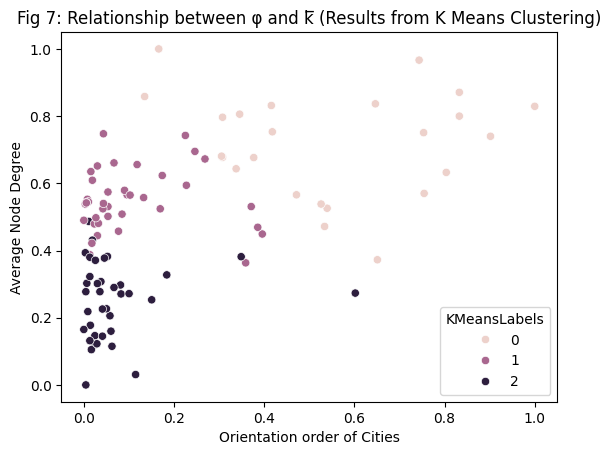

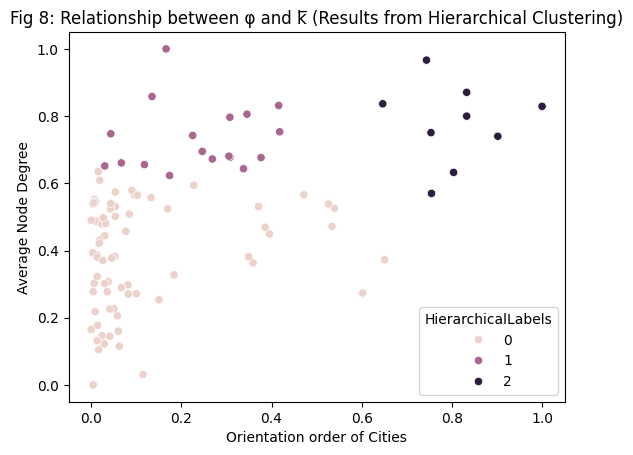

In [60]:
# Plotting the scatterplot for one of the key indicators (w.r.t the paper)
# φ - Represents the ORIENTATION ORDER of the cities


# Orientation Order (φ) v/s Average Node Degree (k̅)

# Using KMeans Clustering Labels
sns.scatterplot(data=df_scaled, x="φ", y="k̅", hue = "KMeansLabels")
plt.xlabel("Orientation order of Cities")
plt.ylabel("Average Node Degree")
plt.title("Fig 7: Relationship between φ and k̅ (Results from K Means Clustering)")
plt.show()

# Using Hierarchical Clustering Labels
sns.scatterplot(data=df_scaled, x="φ", y="k̅", hue = "HierarchicalLabels")
plt.xlabel("Orientation order of Cities")
plt.ylabel("Average Node Degree")
plt.title("Fig 8: Relationship between φ and k̅ (Results from Hierarchical Clustering)")
plt.show()

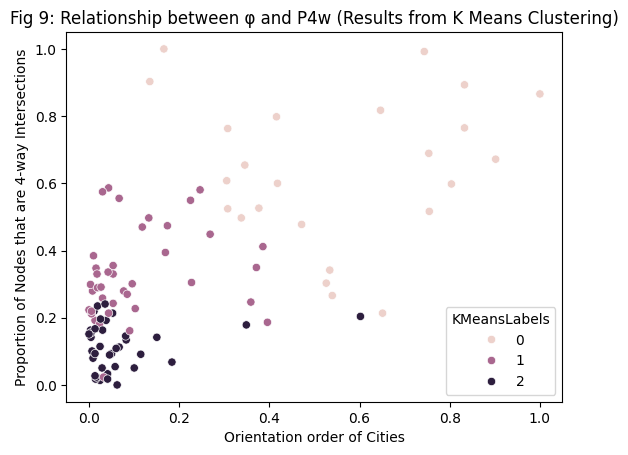

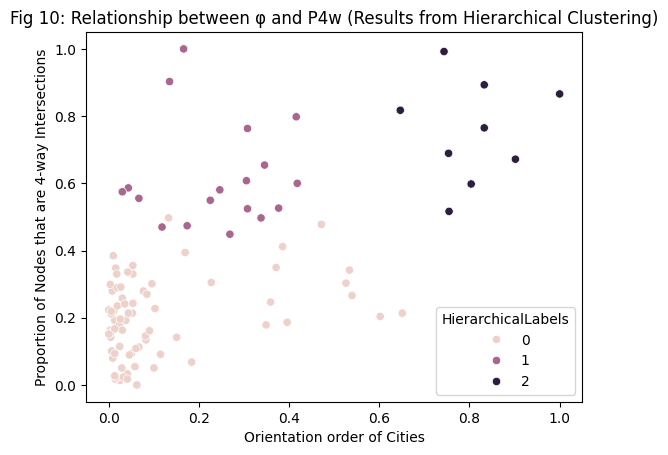

In [61]:
# Orientation Order (φ) v/s Proportion of Nodes that are 4-way Intersections (P4w)

# Using KMeans Clustering Labels
sns.scatterplot(data=df_scaled, x="φ", y="P4w", hue = "KMeansLabels")
plt.xlabel("Orientation order of Cities")
plt.ylabel("Proportion of Nodes that are 4-way Intersections")
plt.title("Fig 9: Relationship between φ and P4w (Results from K Means Clustering)")
plt.show()

# Using Hierarchical Clustering Labels
sns.scatterplot(data=df_scaled, x="φ", y="P4w", hue = "HierarchicalLabels")
plt.xlabel("Orientation order of Cities")
plt.ylabel("Proportion of Nodes that are 4-way Intersections")
plt.title("Fig 10: Relationship between φ and P4w (Results from Hierarchical Clustering)")
plt.show()

<Axes: title={'center': 'Fig 11: K Means Clustering - Region v/s Navigation'}, xlabel='Clustered Class', ylabel='Count of Cities in Regions'>

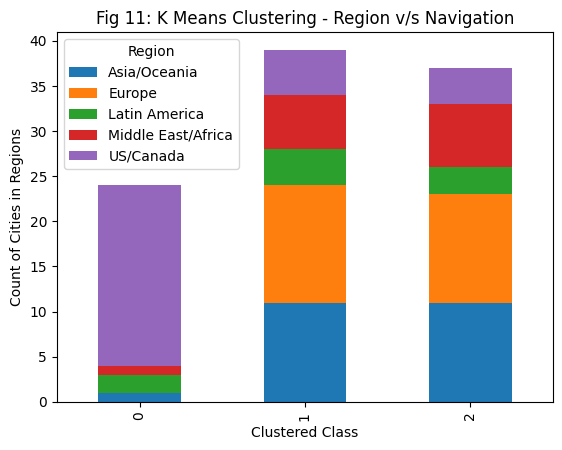

In [62]:
# Grouping the dataset into regions for Stacked bar Graph

# KMeans
gKdf = df_scaled.groupby(['Region', 'KMeansLabels'])['Region'].count()
gKdf = gKdf.unstack('Region')

# Choosing columns to plot
col_to_plot = gKdf.columns.tolist()

# Plot command
gKdf[col_to_plot].plot(kind='bar', stacked=True, title = "Fig 11: K Means Clustering - Region v/s Navigation",
                       xlabel = "Clustered Class", ylabel="Count of Cities in Regions")

<Axes: title={'center': 'Fig 12: Hierarchical Clustering - Region v/s Navigation'}, xlabel='Clustered Class', ylabel='Count of Cities in Regions'>

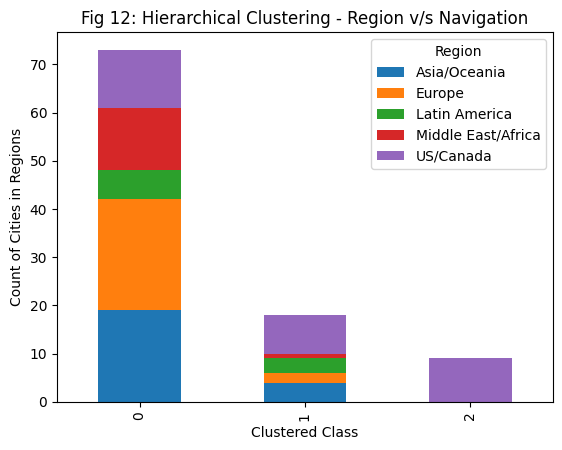

In [63]:
# Hierarchical
gHdf = df_scaled.groupby(['Region', 'HierarchicalLabels'])['Region'].count()
gHdf = gHdf.unstack('Region')

# Choosing columns to plot
col_to_plot = gHdf.columns.tolist()

# Plot command
gHdf[col_to_plot].plot(kind='bar', stacked=True, title = "Fig 12: Hierarchical Clustering - Region v/s Navigation",
                       xlabel = "Clustered Class", ylabel="Count of Cities in Regions")

In [64]:
# Cities in the US/Canada that are in "Bad Spatial Order" cluster according to K Means
df_scaled[(df_scaled['Region'] == 'US/Canada') & (df_scaled['KMeansLabels'] == 2)]['City']

71      Atlanta
74    Charlotte
80     Honolulu
82    Las Vegas
Name: City, dtype: object

In [65]:
# Cities in the US/Canada that are in "Average Spatial Order" cluster according to K Means
df_scaled[(df_scaled['Region'] == 'US/Canada') & (df_scaled['KMeansLabels'] == 1)]['City']

72      Baltimore
73         Boston
83    Los Angeles
87       Montreal
92     Pittsburgh
Name: City, dtype: object

In [66]:
# Cities in the Asia/Oceania, Latin America and Middle-East/Africa that are in "Good Spatial Order" cluster according to K Means
df_scaled[((df_scaled['Region'] == 'Asia/Oceania') | (df_scaled['Region'] == 'Latin America') | (df_scaled['Region'] == 'Middle East/Africa'))
 & (df_scaled['KMeansLabels'] == 0)]['City']

10       Melbourne
49    Buenos Aires
52            Lima
68       Mogadishu
Name: City, dtype: object

In [67]:
# Cities in the Asia/Oceania, Latin America and Middle-East/Africa that are in "Average Spatial Order" cluster according to K Means
df_scaled[((df_scaled['Region'] == 'Asia/Oceania') | (df_scaled['Region'] == 'Latin America') | (df_scaled['Region'] == 'Middle East/Africa'))
 & (df_scaled['KMeansLabels'] == 1)]['City']

1         Beijing
6         Karachi
8           Kyoto
9          Manila
13          Osaka
14     Phnom Penh
16          Seoul
17       Shanghai
18      Singapore
20         Taipei
21          Tokyo
48         Bogota
51         Havana
53    Mexico City
56      Sao Paulo
57        Baghdad
58         Beirut
59          Cairo
61     Casablanca
63          Dubai
64       Istanbul
Name: City, dtype: object

***Insights formed based on the Clustering Results:***

- When orientation order is plotted against a few key indicators, it shows a linear relationship.
According to the research paper, The lower orientation order, the less spatially good the city is, and vice versa. The visualization further confirms this point.

- Most of US/Canada cities is clustered into the "Good Spatial Order" category, mainly because most of these cities exhibit a grid-like architecture.

- A significant number of cities from US/Canada are also in the "Average Spatial Order" cluster, but very (for eg: Charlotte) can be found in the "Bad Spatial Order" cluster. This indicates that these cities are well planned and better to navigate.

- As US/Canada cities might be heavily influenced by Colonial architecture, we would expect cities in Europe to follow the same pattern as these regions, but ironically, cities in Europe is barely classified as cities with better spatial order. This indicates that cities in Europe are less "grid-like" and thus, less easy to navigate.

- Europe's cities are much older than many cities in the US/Canada region. Thus, this resulted in a lot of organic growth, pertaining to the natural environment.

- Cities in regions like Asia/Oceania, Latin America and Middle-East/Africa are clustered in all the categories, with more than half clustered into Bad and Average Spatial Order, showing that these cities adapted to natural growth, resulting in irregular street and poor planning.

- Some cities in these regions are good for transportation: ie, have a better urban spatial order: Melbourne, Mogadishu, Lima to name a few.


***Challenges faced with Clustering***

- Handling of Outliers was difficult, as the dataset contained already researched indicators. It was tough to determine one single way for Data Imputation for these outliers, which might've resulted in some mis-clustering.

- Both the clustering algorithm's results were not same as each other, which resulted in difficulty to analyse and provide insights.


***References***

Dataset: https://appliednetsci.springeropen.com/articles/10.1007/s41109-019-0189-1/tables/1

https://appliednetsci.springeropen.com/articles/10.1007/s41109-019-0189-1#Sec10

https://appliednetsci.springeropen.com/articles/10.1007/s41109-019-0189-1/figures/4

https://reason.org/commentary/examining-sprawl-in-europe-and/#:~:text=At%20the%20beginning%20of%20the,transport%2C%20much%20less%20the%20car.
